### Task A1 - Linear Regression machine learning task using SciKitLearn

In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed several regression models, including linear regression. The dataset used in the original study is available [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

**Task:** Apply machine learning to a modified version of the original dataset and report the results.


[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020 [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

The original research article and a modified dataset are posted on the MA124 Moodle page in the resources for this project. You will need to refer to the article for some of the tasks below. You will need to download SeoulBikeData_mod.csv and put it into the folder with this file.

SeoulBikeData_mod.csv has been modified from the original dataset to remove the categorical variables, and to convert dates to months. Months have been coded by number, e.g. 1 = January, etc. Only half the months are included in the modified dataset.

---

While the number of tasks is large, this is in part because the instructions are rather specific. Many of them are very similar to things you saw in term 1, in the week 8 and week 10 notebooks and lectures.

**Specifically, your code should**

1. Import needed libraries. (You will need pandas, as well as things from sklearn, and of course numpy and matplotlib.)

2. Using pandas, read SeoulBikeData_mod.csv into a Dataframe.

3. `describe` the Dataframe.

4. Plot a histogram of `Rented Bike Count`. Do not plot this as a density, but as a count. See Fig. 3 of the article. The vertical axis in the article is labelled "frequency", but is the same as the count.

    Produce a box plot similar to that in Fig. 3 of the article.
    
    Try to generate both the histogram and box plot to look approximately as they do in the article.

5. From the full Dataframe, create a new Dataframe `X` containing all the columns except `Rented Bike Count` and a Series `y` containing only the `Rented Bike Count` column. These are your design matrix and target respectively.

6. Perform a test-train split to create `X_train`, `X_test`, `y_train` and `y_test`. You **must** use the same percentage of data for testing and training as was used in the article and you **must** state what they are. You can find these in the article.

7. Create and train a linear regression model.

8. Use the trained model to obtain `y_pred`, the prediction on the test data `X_test`. Form the residual `resid = y_test - y_pred`.

9. Compute and report: Rsquared (R2), the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Coefficient of Variation (CV). Compare these results to those on the top, right of Table 4 of the article. (Note, the modified dataset we are studying is different from that used in the article. Hence the results will not be identical. However, the procedure is very close to that used in the article.)

10. Produce and comment on the following plots.

- Histograms of `y_test` and of `y_pred` (on the same plot). These should be reported as counts rather than densities.

- A scatter plot of `resid` as a function of `y_test` corresponding to Fig. 9 of the article. (Recall what `y_test` represents and label the plot appropriately.) Unlike Fig. 9 of the paper, you should use a colormap to plot the different `Hours` in different colours.

- A scatter plot of `resid` as a function of `X_test['Month']`. Use a colormap to indicate the absolute value of `resid`.

- A scatter plot of `resid` as a function of `X_test['Rainfall(mm)']`. Use a colormap to indicate the absolute value of `resid`.

*Insert code and markdown cells below in which to answer this.*

       Rented Bike Count        Hour  Temperature(°C)  Humidity(%)  \
count        4416.000000  4416.00000      4416.000000  4416.000000   
mean          704.591259    11.50000        13.203986    59.257246   
std           637.407244     6.92297        11.529724    20.162981   
min             0.000000     0.00000       -17.800000     0.000000   
25%           189.000000     5.75000         4.500000    44.000000   
50%           542.000000    11.50000        14.300000    58.000000   
75%          1047.000000    17.25000        22.200000    75.000000   
max          3298.000000    23.00000        38.000000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       4416.000000       4416.000000                4416.000000   
mean           1.653193       1398.641304                   4.723958   
std            0.976361        621.560536                  12.671445   
min            0.000000         27.000000                 -30.600000   
25%      

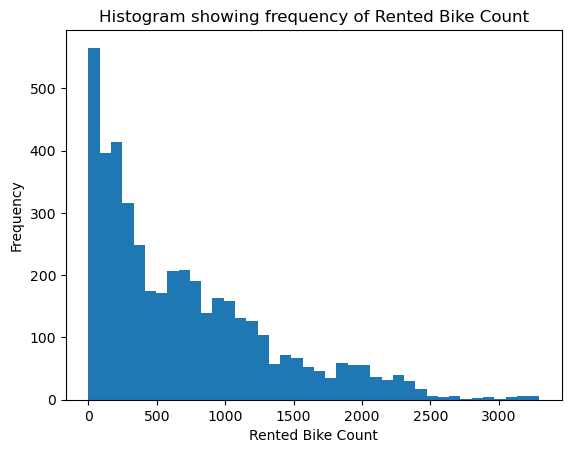

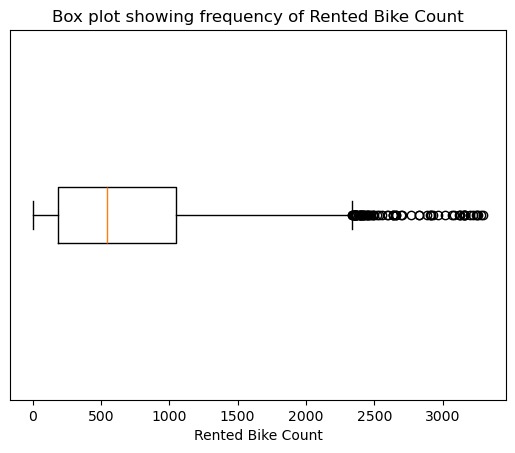

Root Mean Squared Error: 464.8653243377273
Rsquared: 0.6798738187379659
Mean Absolute Error: 340.01547885746163
Coefficient of Variation: 0.5907081069199666


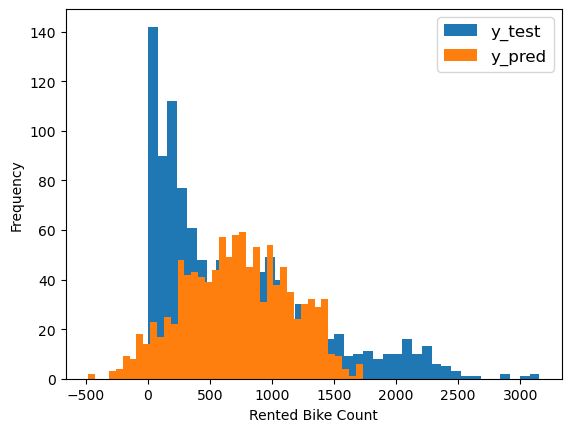

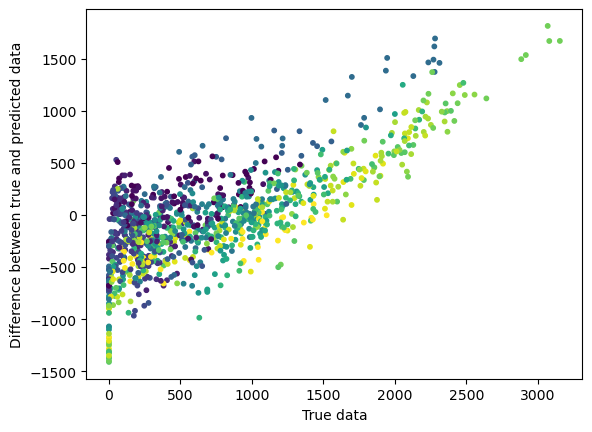

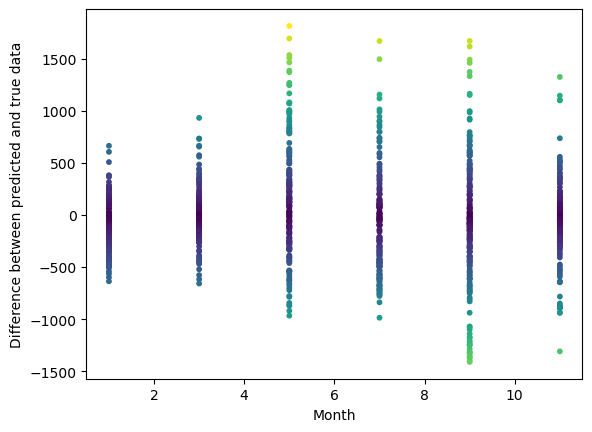

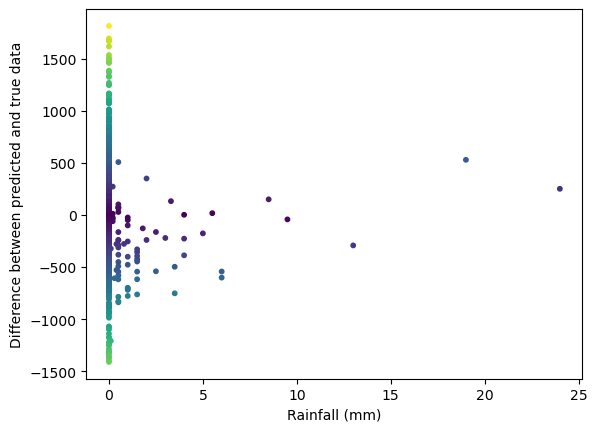

In [2]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn import linear_model, metrics

#choose data

dataframe = pd.read_csv("../data/SeoulBikeData_mod.csv")
print(dataframe.describe())

#original data histogram 

plt.hist(dataframe['Rented Bike Count'], bins = 40)
plt.title('Histogram showing frequency of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')

plt.show()

#original data boxplot

plt.boxplot(dataframe['Rented Bike Count'], vert = False)

plt.title('Box plot showing frequency of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.yticks([])

plt.show()

# shuffle data

dataframe = dataframe.sample(frac=1)

#test-train split

X = dataframe.drop('Rented Bike Count', axis = 1)
y=dataframe['Rented Bike Count']

X_test = X[int(len(X)*3/4)+1:]
X_train = X[0:int(len(X)*3/4)]
y_test = y[int(len(y)*3/4)+1:]
y_train =  y[0:int(len(y)*3/4)]

#predictions

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
resid = y_test - y_pred

#statistics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = np.corrcoef(y_test, y_pred)[0,1]
mae = np.abs(np.subtract(y_test, y_pred)).mean()
cv = np.std(y_pred)/np.mean(y_pred)

print('Root Mean Squared Error: ' + str(rmse))
print('Rsquared: ' + str(r_squared))
print('Mean Absolute Error: ' + str(mae))
print('Coefficient of Variation: ' + str(cv))

#histograms

plt.hist(y_test, bins = 40, label = 'y_test')
plt.hist(y_pred, bins = 40, label = 'y_pred')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.legend(fontsize="12")
plt.show()

#for colourmap

residcol = abs(resid)
hours = (dataframe["Hour"])[int(len(X)*3/4)+1:]

#scatter diagrams

plt.scatter(y_test, resid, s=10, c=hours, cmap="viridis")
plt.xlabel('True data')
plt.ylabel('Difference between true and predicted data')
plt.show()

plt.scatter(X_test['Month'], resid, c=residcol, s=10)
plt.xlabel('Month')
plt.ylabel('Difference between predicted and true data')
plt.show()

plt.scatter(X_test['Rainfall(mm)'], resid, c=residcol, s=10)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Difference between predicted and true data')
plt.show()

Proportion of X_train and X_test is 3:1

Root Mean Squared Error: 546.4069211591641 Rsquared: 0.49067441168620846 Mean Absolute Error: 404.70672391184775 Coefficient of variation: 0.4184565219935211

RMSE is much larger than the one in the article, meaning that our model predicts worse than the one in the one in the article. R squared is smaller than in the article, meaning that the relationship between y_pred and y_test is weaker. MAE is larger than the one in article, so the model makes a larger error. CV is smaller which means our model has less errors.

The histogram shows that the predicted data is more accurate in the 500-1500 range but not beyond this (failed to predict more extreme values).

The first scatter diagram is consistent with the histogram because it shows that the data was well predicted around 1000.

The second scatter diagram shows that the predictions of the data collected in September was mainly overestimated and in November underestimated.

The third scatter diagram shows that the model predicted more accurately for higher values of rainfall. But for rainfall = 0 mm it does not predict very accurately.
